In [1]:
# Libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
data = pd.read_csv('../data/model-cleaned-players22.csv')

data['value_eur'] = np.log(data['value_eur'])

In [3]:
y = data['value_eur']
x = data.drop(columns= 'value_eur')

x_trai, x_tes, y_train, y_test = train_test_split(
   x, y, test_size=0.2, random_state=0
)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_trai)
x_test = scaler.transform(x_tes)

x_train

array([[-1.18158287,  0.45282297,  0.12640773, ..., -0.08377233,
        -0.02266631, -0.02841789],
       [-0.04941603, -0.7278556 , -0.20418031, ..., -0.08377233,
        -0.02266631, -0.02841789],
       [-1.18158287, -0.28510114, -1.19594441, ..., -0.08377233,
        -0.02266631, -0.02841789],
       ...,
       [-0.04941603, -0.13751631,  1.44875986, ..., -0.08377233,
        -0.02266631, -0.02841789],
       [-0.04941603, -0.28510114,  0.12640773, ..., -0.08377233,
        -0.02266631, -0.02841789],
       [-1.18158287,  1.04316225,  1.61405388, ..., -0.08377233,
        -0.02266631, -0.02841789]])

In [4]:
lr = LinearRegression()
lr.fit(x_train, y_train)
 
c = lr.intercept_
c

13.960091111194059

In [5]:
m = lr.coef_
m

array([ 1.93207047e-02,  1.18559646e+00,  5.24359245e-02,  8.29629566e-02,
       -4.62251204e-01,  6.42845781e-03,  6.50830916e-03,  3.26772433e-03,
       -2.29920132e-03, -2.15641484e-03,  9.92567256e-03,  2.87366268e-02,
       -2.03664419e-03, -1.45404638e-02, -2.24846009e-02, -3.28276053e-02,
       -6.68404553e-02,  1.98646446e-01,  5.11796554e-02,  3.34597659e-03,
        2.30155268e-02, -1.02680115e-02,  1.70252478e-02,  1.38503912e-02,
        4.21007772e-02, -1.01984446e-02,  1.00319336e-02,  1.35652632e-03,
        1.28575784e-02,  1.89394744e-02,  2.50926544e-02, -2.01530440e-03,
        2.02448019e-02,  8.38392438e-03, -3.96084950e-04, -1.73462310e-03,
       -4.97728371e-04, -3.44824856e-02, -6.15970089e-03, -1.47102682e-02,
       -4.70966053e-02,  8.11085630e-03,  1.12766715e-02, -1.83264523e-04,
       -2.37008039e-03, -6.56145824e-02, -6.33200284e-02, -3.57072750e-02,
       -6.61066175e+10,  1.22659156e+10, -6.25351934e+10,  1.50748195e-03,
       -6.25351934e+10,  

In [6]:
y_pred_train = lr.predict(x_train)
y_pred_train

array([14.46823647, 13.48800696, 13.0569105 , ..., 14.23923857,
       13.69912241, 15.69648975])

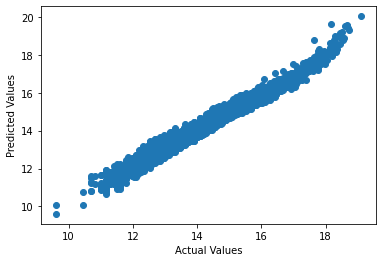

In [7]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [8]:
r2_score(y_train, y_pred_train)

0.9791557155614679

In [17]:
y_pred_test = lr.predict(x_test)

# I noticed that all scores in the y_pred_test falls within the range of 10 and 20
# except for 4 rows with numbers in the millions. Because 2 is a very small number from
# over 17000 rows, I decided it's best to remove them because they completely skew the analysis.
lower_bound = 10
upper_bound = 21

# Use boolean indexing to filter out outliers from y_pred_test
outliers_removed_y_pred_test = y_pred_test[(y_pred_test >= lower_bound) & (y_pred_test <= upper_bound)]

# Use the same index to remove corresponding rows from y
outliers_removed_y_test = y_test[(y_pred_test >= lower_bound) & (y_pred_test <= upper_bound)]

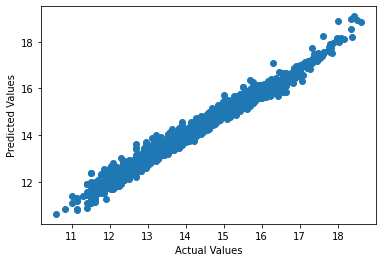

In [19]:
plt.scatter(outliers_removed_y_test, outliers_removed_y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [20]:
r2_score(outliers_removed_y_test, outliers_removed_y_pred_test)

0.9774320443755623

In [21]:
# Calculate the Root Mean Squared Error (RMSE)
mse = mean_squared_error(outliers_removed_y_test, outliers_removed_y_pred_test)
rmse = np.sqrt(mse)

print('rmse: ', rmse)

rmse:  0.18005657199851258


In [29]:
cross_val_score_train = cross_val_score(lr, x_train, y_train, scoring='r2', cv=10)

print(np.mean(cross_val_score_train))

-1.6283611727066783e+24


In [30]:
cross_val_score_test = cross_val_score(lr, x_test, y_test, scoring='r2', cv=10)
r2_score_test = np.mean(cross_val_score_test)

print('r2_score_test: ', r2_score_test)


r2_score_test:  -9.536878169744098e+24


In [34]:
# Calculate the RMSE from the cross-validated predictions
y_pred = cross_val_predict(lr, x_train, y_train, cv=10)

# I noticed that all scores in the y_pred falls within the range of 9 and 21
# except for 27 rows with numbers in the millions and negative millions. Since 27 is a very small number from
# over 13000 rows, I decided it's best to remove them because they completely skew the analysis.
lower_bound = 9
upper_bound = 21

# Use boolean indexing to filter out outliers from y_pred
outliers_removed_y_pred = y_pred[(y_pred >= lower_bound) & (y_pred <= upper_bound)]

# Use the same index to remove corresponding rows from y
outliers_removed_y_train = y_train[(y_pred >= lower_bound) & (y_pred <= upper_bound)]

rmse = np.sqrt(mean_squared_error(outliers_removed_y_train, outliers_removed_y_pred))
wo_rmse = np.sqrt(mean_squared_error(y_train, y_pred))

print('Cross-Validated rmse: ', rmse)
print('Cross-Validated rmse with outliers: ', wo_rmse)

Cross-Validated rmse:  0.18637663031587484
Cross-Validated rmse with outliers:  1513999832082.1343
